# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [31]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

## Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

## Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

## Combine the data into a single dataset
print(mouse_metadata.head(3))
print(study_results.head(3))
merge_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

## Display the data table for preview
merge_mouse_df

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
## Checking the number of mice.
total_mice = len(merge_mouse_df)
print(total_mice)

1893


In [5]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_mouse_df[merge_mouse_df.duplicated([ 'Mouse ID','Timepoint' ])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
## Optional: Get all the data for the duplicate mouse ID. 
g989_duplicate_data = merge_mouse_df.loc[ 908:917, : ]
compression_opts = dict(method='zip',
                        archive_name='g989_duplicate_data.csv')  
g989_duplicate_data.to_csv('g989_duplicate_data.zip', index=False,
          compression=compression_opts)  

In [7]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_names = merge_mouse_df[ merge_mouse_df['Mouse ID'] == 'g989' ].index
merge_mouse_df.drop(index_names, inplace = True) 
clean_mouse_df = merge_mouse_df
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
## Checking the number of mice in the clean DataFrame.
count_mice = clean_mouse_df.drop_duplicates(subset=['Mouse ID'])
count_mice = len(count_mice)
count_mice

248

## Summary Statistics

In [9]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_df = clean_mouse_df[['Drug Regimen','Tumor Volume (mm3)']]

## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats_df = drug_tumor_df.groupby(drug_tumor_df['Drug Regimen'])

## Mean
mean_df = summary_stats_df['Tumor Volume (mm3)'].mean()
#mean_df = pd.DataFrame(mean_df, columns=['Tumor Volume (mm3)'])
print(mean_df)
#print(mean_summary_df.head(3))

## Median
med_df = summary_stats_df['Tumor Volume (mm3)'].median()
#print(med_summary_df.head(3))

## Variance
var_df = summary_stats_df['Tumor Volume (mm3)'].var()
#print(var_summary_df.head(3))

## Standard Deviation
std_df = summary_stats_df['Tumor Volume (mm3)'].std()
#print(std_summary_df.head(3))

## SEM (standard error of the mean)
sem_df = summary_stats_df['Tumor Volume (mm3)'].sem()
#print(sem_summary_df.head(3))

# Assemble the resulting series into a single summary dataframe.
#summary_df = 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [54]:
## Dataframe for Bar Charts
total_measurement_df = drug_tumor_df.groupby(drug_tumor_df['Drug Regimen'])
total_measurement_df = total_measurement_df.count()

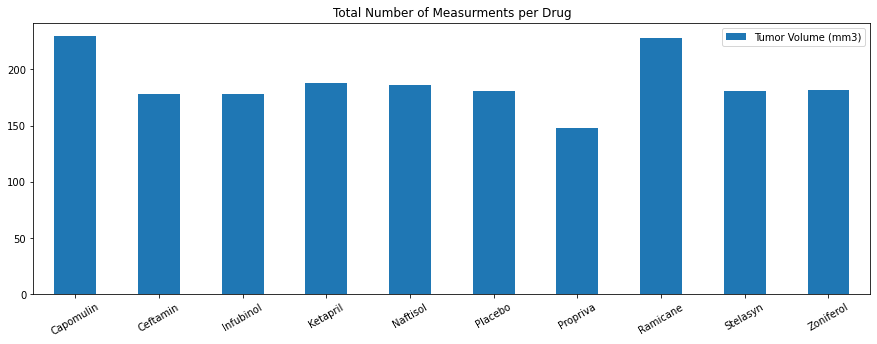

In [74]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurement_df.plot(kind='bar', title='Total Number of Measurments per Drug', figsize=(15,5), width=.5)
plt.xlabel('')
plt.xticks(rotation = 30)
plt.show()

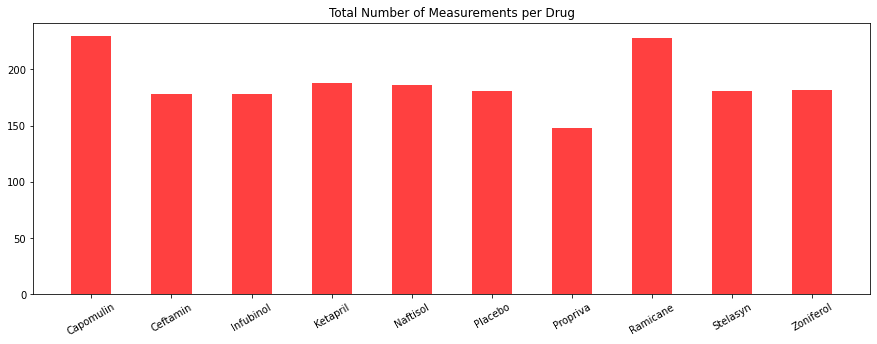

In [71]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(total_measurement_df.index, total_measurement_df['Tumor Volume (mm3)'], color='r', alpha=0.75, align='center',
       width=.5)
plt.title('Total Number of Measurements per Drug')
plt.xticks(rotation = 30)
plt.show()

In [96]:
## Dataframe for Pie Charts
gender_df = clean_mouse_df['Sex']
gender_df = pd.DataFrame(gender_df)
female_count = len(gender_df.loc[gender_df['Sex']=="Female",:])
male_count = len(gender_df.loc[gender_df['Sex']=="Male",:])


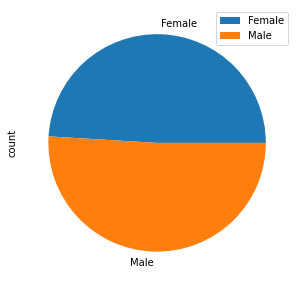

In [97]:
## Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pandas_df = pd.DataFrame({'count': [female_count , male_count]},
                  index=['Female','Male'])
plot = gender_pandas_df.plot.pie(y='count', figsize=(5, 5))

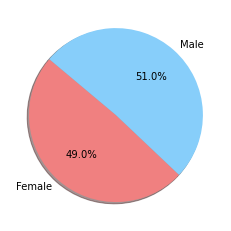

In [93]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female" , "Male"]
gender_counts = [female_count , male_count]
colors = ["lightcoral" , "lightskyblue"]

plt.pie(gender_counts, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen